# Analysing for 24 chromosomes

merging data

In [28]:
import pandas as pd

In [29]:
cultivars = pd.read_csv("Cultivars.csv")
cultivars.head()

,Cultivar Name,Cultivar ID,Subpopulation,Location,Accession
0,02428,C152,Temperate Japonica,Jiangsu,SRR1239752
1,02428-IL,CX277,Temperate Japonica,China,ERS470588
2,053A-3,CX351,Temperate Japonica,China,ERS470636
3,10340,W146,Indica I,Italy,SRR1239949
4,104_UPLA,IRIS_313-8063,Tropical Japonica,Argentina,ERS468624


In [30]:
heights = pd.read_csv("Height.csv")
heights.head()

,Cultivar Name,Cultivar ID,Subpopulation,Plant Height (cm)
0,02428,C152,Temperate Japonica,100.0
1,10340,W146,Indica I,127.4
2,108S,W150,Indica II,104.6
3,2,W129,VI/Aromatic,151.2
4,4484,W086,Indica II,103.4


In [31]:
genotype = pd.read_csv("Genotype_24chr.csv")
genotype = genotype.rename(columns={'Variation ID': 'Cultivar ID'})
genotype.head()

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
0,Chromosome,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,...,chr07,chr07,chr07,chr07,chr08,chr09,chr09,chr10,chr11,chr12
1,Position,12116426,28525986,30976864,31664768,33440209,35617816,35642980,38418739,38428840,...,13178880,19727299,19727339,19834473,19793460,4094998,4282939,19044175,23563633,7667840
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,...,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP
3,Reference,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
4,Primary Allele,G,A,G,G,G,C,C,A,T,...,T,G,T,C,A,C,C,T,T,T


In [32]:
genotype.shape

(4732, 25)

In [33]:
# counting del values for each SNP

delCount = []
for i in range(1, genotype.shape[1]):
    val = 0
    for j in range(6, genotype.shape[0]):
        if genotype.iloc[j, i] == "DEL":
            val = val + 1
    delCount.append((genotype.columns[i],val))

print(sorted(delCount, key=lambda x : x[1], reverse=True))

[('vg0719834473', 2501), ('vg0128525986', 2393), ('vg0405463763', 1882), ('vg0405463422', 1667), ('vg0131664768', 1243), ('vg0603483061', 700), ('vg1123563633', 384), ('vg0904094998', 336), ('vg0133440209', 252), ('vg0135617816', 148), ('vg0719727299', 83), ('vg0719727339', 67), ('vg0138608956', 12), ('vg0135642980', 9), ('vg0112116426', 0), ('vg0130976864', 0), ('vg0138418739', 0), ('vg0138428840', 0), ('vg0138999212', 0), ('vg0713178880', 0), ('vg0819793460', 0), ('vg0904282939', 0), ('vg1019044175', 0), ('vg1207667840', 0)]


In [34]:
# counting n values for each SNP

delCount = []
for i in range(1, genotype.shape[1]):
    val = 0
    for j in range(6, genotype.shape[0]):
        if genotype.iloc[j, i] == "N":
            val = val + 1
    delCount.append((genotype.columns[i],val))

print(sorted(delCount, key=lambda x : x[1], reverse=True))

[('vg0603483061', 927), ('vg0133440209', 833), ('vg0405463422', 815), ('vg0405463763', 396), ('vg0904094998', 328), ('vg0138999212', 148), ('vg0131664768', 144), ('vg0128525986', 133), ('vg0130976864', 79), ('vg0135617816', 64), ('vg0112116426', 30), ('vg0719727299', 19), ('vg0138428840', 17), ('vg0719727339', 17), ('vg0138418739', 16), ('vg0719834473', 14), ('vg0819793460', 11), ('vg1123563633', 9), ('vg1207667840', 7), ('vg0135642980', 4), ('vg0713178880', 4), ('vg0138608956', 2), ('vg1019044175', 1), ('vg0904282939', 0)]


In [35]:
genotype.head()

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
0,Chromosome,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,...,chr07,chr07,chr07,chr07,chr08,chr09,chr09,chr10,chr11,chr12
1,Position,12116426,28525986,30976864,31664768,33440209,35617816,35642980,38418739,38428840,...,13178880,19727299,19727339,19834473,19793460,4094998,4282939,19044175,23563633,7667840
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,...,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP
3,Reference,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
4,Primary Allele,G,A,G,G,G,C,C,A,T,...,T,G,T,C,A,C,C,T,T,T


In [36]:
genotypeHeader = genotype.iloc[:6, :]
primaryAlleleRow = 4
secondaryAlleleRow = 5
genotypeHeader

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
0,Chromosome,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,chr01,...,chr07,chr07,chr07,chr07,chr08,chr09,chr09,chr10,chr11,chr12
1,Position,12116426,28525986,30976864,31664768,33440209,35617816,35642980,38418739,38428840,...,13178880,19727299,19727339,19834473,19793460,4094998,4282939,19044175,23563633,7667840
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,...,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP
3,Reference,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
4,Primary Allele,G,A,G,G,G,C,C,A,T,...,T,G,T,C,A,C,C,T,T,T
5,Secondary Allele,A,G,A,A,A,T,G,G,C,...,A,A,C,T,T,A,T,C,C,C


In [37]:
genotype = genotype.iloc[6:, :]
genotype

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
6,B001 (Heibiao) Imputed,G,A,G,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,T,T
7,B002 (Sansuijin) Imputed,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,T
8,B003 (Zaoshengbai__) Imputed,G,A,A,G,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
9,B004 (Qiuguangtengxi_104_) Imputed,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
10,B005 (Wanshi) Imputed,G,A,A,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,DEL,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,W326 (Haolvguangnian) Imputed,G,A,G,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,C
4728,W327 (JinghuB) Imputed,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,C
4729,W328 (Sibeitichao6) Imputed,G,A,A,A,N,C,C,A,T,...,T,A,C,C,A,C,C,C,T,T
4730,W329 (GPNO_5055) Imputed,A,DEL,G,G,G,C,C,A,T,...,T,G,C,C,A,A,C,T,T,C


In [38]:
# replacing genotype for each column with their primary allele

for i in range(1, genotype.shape[1]):
    primaryAllele = genotypeHeader.iloc[primaryAlleleRow, i]
    secondaryAllele = genotypeHeader.iloc[secondaryAlleleRow, i]
    col = genotype.iloc[:, i]
    col.replace("DEL", secondaryAllele, inplace=True)
    col.replace("N", primaryAllele, inplace=True)

genotype

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
6,B001 (Heibiao) Imputed,G,A,G,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,T,T
7,B002 (Sansuijin) Imputed,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,T
8,B003 (Zaoshengbai__) Imputed,G,A,A,G,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
9,B004 (Qiuguangtengxi_104_) Imputed,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
10,B005 (Wanshi) Imputed,G,A,A,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,W326 (Haolvguangnian) Imputed,G,A,G,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,C
4728,W327 (JinghuB) Imputed,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,C
4729,W328 (Sibeitichao6) Imputed,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,C,C,C,T,T
4730,W329 (GPNO_5055) Imputed,A,G,G,G,G,C,C,A,T,...,T,G,C,C,A,A,C,T,T,C


In [39]:
def extractVariantID(cultivarID):
    return cultivarID.split(sep=" ")[0]

genotype['Cultivar ID'] = genotype['Cultivar ID'].map(extractVariantID)
genotype

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0713178880,vg0719727299,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840
6,B001,G,A,G,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,T,T
7,B002,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,T
8,B003,G,A,A,G,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
9,B004,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,T
10,B005,G,A,A,A,G,C,C,A,T,...,A,A,C,C,A,A,C,C,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,W326,G,A,G,A,G,C,C,A,T,...,T,A,C,C,A,A,C,C,T,C
4728,W327,G,A,A,A,G,C,C,A,T,...,T,G,T,T,A,A,C,C,T,C
4729,W328,G,A,A,A,G,C,C,A,T,...,T,A,C,C,A,C,C,C,T,T
4730,W329,A,G,G,G,G,C,C,A,T,...,T,G,C,C,A,A,C,T,T,C


In [40]:
mapping = pd.merge(genotype, heights.iloc[:, 1:4], on='Cultivar ID' )

In [41]:
mapping

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0719727339,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840,Subpopulation,Plant Height (cm)
0,C001,G,G,G,A,G,C,C,A,T,...,T,T,T,C,C,C,C,C,Indica I,144.13
1,C002,G,G,G,G,G,C,C,A,C,...,C,C,T,C,C,C,C,C,VI/Aromatic,177.62
2,C003,G,A,G,A,G,C,C,A,T,...,C,C,A,A,C,C,T,T,Japonica Intermediate,141.57
3,C004,G,A,G,G,G,C,C,A,T,...,C,T,A,C,T,C,T,C,Temperate Japonica,140.40
4,C005,A,G,G,G,G,C,C,A,T,...,C,C,A,A,C,T,T,C,Tropical Japonica,163.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,W326,G,A,G,A,G,C,C,A,T,...,C,C,A,A,C,C,T,C,Japonica Intermediate,155.40
525,W327,G,A,A,A,G,C,C,A,T,...,T,T,A,A,C,C,T,C,Temperate Japonica,89.80
526,W328,G,A,A,A,G,C,C,A,T,...,C,C,A,C,C,C,T,T,Intermediate,117.40
527,W329,A,G,G,G,G,C,C,A,T,...,C,C,A,A,C,T,T,C,Tropical Japonica,147.40


In [42]:
mapping['sequence'] = mapping.apply(lambda x: ''.join(x[1:-2]), axis=1)

In [43]:
mapping

,Cultivar ID,vg0112116426,vg0128525986,vg0130976864,vg0131664768,vg0133440209,vg0135617816,vg0135642980,vg0138418739,vg0138428840,...,vg0719834473,vg0819793460,vg0904094998,vg0904282939,vg1019044175,vg1123563633,vg1207667840,Subpopulation,Plant Height (cm),sequence
0,C001,G,G,G,A,G,C,C,A,T,...,T,T,C,C,C,C,C,Indica I,144.13,GGGAGCCATCGTAATGTTTCCCCC
1,C002,G,G,G,G,G,C,C,A,C,...,C,T,C,C,C,C,C,VI/Aromatic,177.62,GGGGGCCACCGTAATGCCTCCCCC
2,C003,G,A,G,A,G,C,C,A,T,...,C,A,A,C,C,T,T,Japonica Intermediate,141.57,GAGAGCCATAGGAGTGCCAACCTT
3,C004,G,A,G,G,G,C,C,A,T,...,T,A,C,T,C,T,C,Temperate Japonica,140.40,GAGGGCCATAGGAGAACTACTCTC
4,C005,A,G,G,G,G,C,C,A,T,...,C,A,A,C,T,T,C,Tropical Japonica,163.33,AGGGGCCATAGTAAAGCCAACTTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,W326,G,A,G,A,G,C,C,A,T,...,C,A,A,C,C,T,C,Japonica Intermediate,155.40,GAGAGCCATAGGTGTACCAACCTC
525,W327,G,A,A,A,G,C,C,A,T,...,T,A,A,C,C,T,C,Temperate Japonica,89.80,GAAAGCCATAGGTGTGTTAACCTC
526,W328,G,A,A,A,G,C,C,A,T,...,C,A,C,C,C,T,T,Intermediate,117.40,GAAAGCCATAGGTATACCACCCTT
527,W329,A,G,G,G,G,C,C,A,T,...,C,A,A,C,T,T,C,Tropical Japonica,147.40,AGGGGCCATAGGTATGCCAACTTC


In [78]:
len(mapping['sequence'].unique())

317

In [45]:
mapping.to_csv('mapping_24.csv', index=False)

In [46]:
mapping_dropped = mapping.drop("vg0128525986", axis=1).drop("vg0131664768", axis=1)

In [47]:
mapping_dropped['sequence'] = mapping_dropped.apply(lambda x: ''.join(x[1:-3]), axis=1)

In [48]:
mapping_dropped.to_csv('mapping_22.csv', index=False)

In [49]:
sequences = []
for i in range(mapping.shape[0]):
    sequences.append((mapping.iloc[i, 0], mapping.iloc[i, -1]))
sequences_dict = dict() 
for x, y in sequences:
    sequences_dict[x]=y
sequences_dict

{'C001': 'GGGAGCCATCGTAATGTTTCCCCC',
 'C002': 'GGGGGCCACCGTAATGCCTCCCCC',
 'C003': 'GAGAGCCATAGGAGTGCCAACCTT',
 'C004': 'GAGGGCCATAGGAGAACTACTCTC',
 'C005': 'AGGGGCCATAGTAAAGCCAACTTC',
 'C006': 'GGGAGCGGTATTAATGTTACCTTT',
 'C007': 'GGGAGCGGTATTAATGTTACCTTT',
 'C008': 'GGGGGCGGTATGTATGTTACCTTC',
 'C009': 'GGGAGCCGTATGAATGTTACCTTT',
 'C010': 'GAGGGCCGTATGTATGCCAACCTT',
 'C011': 'GGGAGCGGTATGTATGTTACCTTT',
 'C012': 'GAAAGCCATAGGTGAGTTAACCTT',
 'C013': 'GGGGGCCACCGTAATGTCTCCCTC',
 'C014': 'GAAAGCGGTATGTGTACCAACTTT',
 'C015': 'GGGGGCCACAGTAATGTCTCCCCC',
 'C016': 'GAGAGCCATAGGTGTACCAACCCT',
 'C017': 'GAAGGCCATAGGTGTACCAACCTT',
 'C018': 'GAAAGCCATAGGTGTACCAACCTT',
 'C019': 'GGGAGCGGTATTAATGTTACCTTT',
 'C020': 'GGGAGCGGTAGTAATGTTACCTCT',
 'C021': 'GGGAGCGGTATTAATGCTACCTCT',
 'C022': 'GGGAGCGATCGGTATGTTACCTTT',
 'C023': 'GAGGGCCATAGGTGTACCAACCTT',
 'C024': 'GGAAGCGATCGTAATGTTAACTCT',
 'C025': 'GGGGGCGGTATGTATGTTACCTTT',
 'C026': 'GAAAGCCATAGGTGTACCAACCTT',
 'C027': 'GGGAGCGGTATGAATGTTACCTTC',
 

In [50]:
filename = 'sequences_24.fasta'

# open the output file for writing
with open(filename, 'w') as f:

    # iterate over each sequence and write to the file in FASTA format
    for seq in sequences:
        cultivar_id, sequence = seq
        name = cultivar_id
        f.write(f'>{name}\n{sequence}\n')

In [51]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
# script to run muscle command line

import subprocess

# Set the input and output file names
input_file = "sequences_24.fasta"
output_file = "aligned_24.fasta"

# Define the MUSCLE command as a list of arguments
muscle_command = ["muscle", "-align", input_file, "-output", output_file]

# Run the MUSCLE command using subprocess
process = subprocess.Popen(muscle_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Get the standard output and error messages
stdout, stderr = process.communicate()

# Print the standard output and error messages
print(stdout.decode())
print(stderr.decode())




muscle 5.1.osxarm64 [ef62d8-dirty]  8.6Gb RAM, 8 cores
Built Jan 15 2022 11:59:50
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 529 seqs, avg length 24, max 24

00:00 24Mb   CPU has 8 cores, running 8 threads
00:02 200Mb   100.0% Calc posteriors  
00:13 501Mb   100.0% Consistency (1/2)  
00:22 914Mb   100.0% Consistency (2/2)  
00:22 917Mb   100.0% UPGMA5           
00:26 930Mb   100.0% Refining



In [52]:
# Read in the FASTA file and create phylogenetic tree
alignment = AlignIO.read("aligned_24.fasta", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the tree using the UPGMA
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(alignment)

# Visualize the tree
# print(Phylo.draw_ascii(tree))

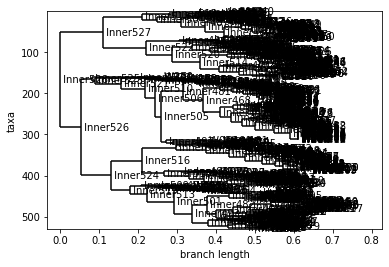

In [53]:
Phylo.draw(tree)

In [54]:
Phylo.write(tree, "tree_24.nwk", "newick")

1

In [55]:
# Get the tuple representation of the tree
def get_tuple(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return (get_tuple(clade.clades[0]), get_tuple(clade.clades[1]))

tree_tuple = get_tuple(tree.clade)

print(tree_tuple)

((((((('C051', 'C119'), 'W158'), (('C014', 'C152'), 'C029')), (('C010', ('W062', 'W041')), ('W294', ('W118', 'W225')))), ('W128', (('W119', (('W193', (('W249', 'W250'), 'W060')), ((('W063', 'W010'), 'W061'), 'W226'))), ((('C035', (('C057', 'C177'), 'C017')), ('W045', 'C023')), ((((('W323', 'W003'), ('C186', ('C185', 'W021'))), (('W127', 'W326'), 'W324')), (('W328', 'W013'), (('W162', ((((((((((((('C150', 'W117'), 'C146'), 'W016'), 'W283'), 'W130'), 'C018'), 'C028'), 'C116'), 'W088'), 'W305'), 'W012'), 'C026'), 'C154')), 'C052'))), (((('C084', 'C085'), ('C056', 'C016')), (('W019', (('W018', 'W139'), 'W064')), ('C070', 'W011'))), ('C063', (('C172', 'C149'), 'C120')))))))), ((('C144', 'C134'), ('C083', (('W319', (('C079', 'C133'), ('C103', 'C196'))), ('C101', 'C106')))), (((('W207', ('C089', ('C082', 'C071'))), ((('W125', 'W038'), 'C032'), 'C138')), (('W067', ((('C074', 'C111'), 'W143'), 'C137')), ((('C003', 'W300'), (('W110', (('W285', 'W284'), (('W002', 'W004'), 'C005'))), 'W116')), ('C

In [56]:
s = str(tree_tuple).replace(" ", "").replace("'", "")
non_characters = ["(", ")", "'"]
clusters = []
i = 0
while i < len(s):
    if s[i] == "(":
        clusterOpen = i
        flag = 0
        i+=1
        while i < len(s):
            if s[i] not in non_characters:
                flag = 1
            if s[i] == "(" and flag == 1:
                break
            i+=1
        clusterClose = i-1
        cluster = s[clusterOpen:clusterClose].replace("(", "").replace(")", "").split(",")
        clusters.append(cluster)

clusters

[['C051', 'C119', 'W158'],
 ['C014', 'C152', 'C029'],
 ['C010'],
 ['W062', 'W041'],
 ['W294'],
 ['W118', 'W225'],
 ['W128'],
 ['W119'],
 ['W193'],
 ['W249', 'W250', 'W060'],
 ['W063', 'W010', 'W061', 'W226'],
 ['C035'],
 ['C057', 'C177', 'C017'],
 ['W045', 'C023'],
 ['W323', 'W003'],
 ['C186'],
 ['C185', 'W021'],
 ['W127', 'W326', 'W324'],
 ['W328', 'W013'],
 ['W162'],
 ['C150',
  'W117',
  'C146',
  'W016',
  'W283',
  'W130',
  'C018',
  'C028',
  'C116',
  'W088',
  'W305',
  'W012',
  'C026',
  'C154',
  'C052'],
 ['C084', 'C085'],
 ['C056', 'C016'],
 ['W019'],
 ['W018', 'W139', 'W064'],
 ['C070', 'W011'],
 ['C063'],
 ['C172', 'C149', 'C120'],
 ['C144', 'C134'],
 ['C083'],
 ['W319'],
 ['C079', 'C133'],
 ['C103', 'C196'],
 ['C101', 'C106'],
 ['W207'],
 ['C089'],
 ['C082', 'C071'],
 ['W125', 'W038', 'C032', 'C138'],
 ['W067'],
 ['C074', 'C111', 'W143', 'C137'],
 ['C003', 'W300'],
 ['W110'],
 ['W285', 'W284'],
 ['W002', 'W004', 'C005', 'W116'],
 ['C087'],
 ['C189', 'C004'],
 ['W122', 

In [57]:
len(clusters)

222

In [60]:
clusters_dict = dict()
for n, cluster in enumerate(clusters):
    clusters_dict[n] = cluster
clusters_dict

{0: ['C051', 'C119', 'W158'],
 1: ['C014', 'C152', 'C029'],
 2: ['C010'],
 3: ['W062', 'W041'],
 4: ['W294'],
 5: ['W118', 'W225'],
 6: ['W128'],
 7: ['W119'],
 8: ['W193'],
 9: ['W249', 'W250', 'W060'],
 10: ['W063', 'W010', 'W061', 'W226'],
 11: ['C035'],
 12: ['C057', 'C177', 'C017'],
 13: ['W045', 'C023'],
 14: ['W323', 'W003'],
 15: ['C186'],
 16: ['C185', 'W021'],
 17: ['W127', 'W326', 'W324'],
 18: ['W328', 'W013'],
 19: ['W162'],
 20: ['C150',
  'W117',
  'C146',
  'W016',
  'W283',
  'W130',
  'C018',
  'C028',
  'C116',
  'W088',
  'W305',
  'W012',
  'C026',
  'C154',
  'C052'],
 21: ['C084', 'C085'],
 22: ['C056', 'C016'],
 23: ['W019'],
 24: ['W018', 'W139', 'W064'],
 25: ['C070', 'W011'],
 26: ['C063'],
 27: ['C172', 'C149', 'C120'],
 28: ['C144', 'C134'],
 29: ['C083'],
 30: ['W319'],
 31: ['C079', 'C133'],
 32: ['C103', 'C196'],
 33: ['C101', 'C106'],
 34: ['W207'],
 35: ['C089'],
 36: ['C082', 'C071'],
 37: ['W125', 'W038', 'C032', 'C138'],
 38: ['W067'],
 39: ['C074',

In [62]:
sequence_cluster_dict = dict()
for k, v in clusters_dict.items():
    for cultivar in v:
        sequence_cluster_dict[cultivar] = k
sequence_cluster_dict

{'C051': 0,
 'C119': 0,
 'W158': 0,
 'C014': 1,
 'C152': 1,
 'C029': 1,
 'C010': 2,
 'W062': 3,
 'W041': 3,
 'W294': 4,
 'W118': 5,
 'W225': 5,
 'W128': 6,
 'W119': 7,
 'W193': 8,
 'W249': 9,
 'W250': 9,
 'W060': 9,
 'W063': 10,
 'W010': 10,
 'W061': 10,
 'W226': 10,
 'C035': 11,
 'C057': 12,
 'C177': 12,
 'C017': 12,
 'W045': 13,
 'C023': 13,
 'W323': 14,
 'W003': 14,
 'C186': 15,
 'C185': 16,
 'W021': 16,
 'W127': 17,
 'W326': 17,
 'W324': 17,
 'W328': 18,
 'W013': 18,
 'W162': 19,
 'C150': 20,
 'W117': 20,
 'C146': 20,
 'W016': 20,
 'W283': 20,
 'W130': 20,
 'C018': 20,
 'C028': 20,
 'C116': 20,
 'W088': 20,
 'W305': 20,
 'W012': 20,
 'C026': 20,
 'C154': 20,
 'C052': 20,
 'C084': 21,
 'C085': 21,
 'C056': 22,
 'C016': 22,
 'W019': 23,
 'W018': 24,
 'W139': 24,
 'W064': 24,
 'C070': 25,
 'W011': 25,
 'C063': 26,
 'C172': 27,
 'C149': 27,
 'C120': 27,
 'C144': 28,
 'C134': 28,
 'C083': 29,
 'W319': 30,
 'C079': 31,
 'C133': 31,
 'C103': 32,
 'C196': 32,
 'C101': 33,
 'C106': 33,
 'W2

In [77]:
unique_sequences_per_cluster = dict()
for k,v in clusters_dict.items():
    unique_sequences_per_cluster[k] = set(sequences_dict[cult] for cult in v)
unique_sequences_per_cluster

{0: {'GAAAGCCGTATGTATGTTAACCTT',
  'GAAAGCCGTATGTATGTTAACTTT',
  'GAAAGCCGTATGTGTGTTAACTTT'},
 1: {'GAAAGCCGTATGTGTACCAACCTT',
  'GAAAGCGGTATGTGTACCAACTTT',
  'GGAAGCCGTATGTATACCAACCTT'},
 2: {'GAGGGCCGTATGTATGCCAACCTT'},
 3: {'GAGGGCCATAGGTAAGCCAACCTT', 'GAGGGCCATAGGTATGCCAACCTT'},
 4: {'GGGGGCCGTATTAATGCCAACTTT'},
 5: {'GAGGGCGGTATGAATGCCAACTTT', 'GAGGGCGGTATGTGTGCCAACTTT'},
 6: {'GAAAGCCACAGGTAAGCCTACCTT'},
 7: {'AAAAGCCATAGGTGAGCCAACTTT'},
 8: {'GAAAGCCATAGGTGAGCCAACCTT'},
 9: {'GAAAGCCATAGGTGAACCAACCTT'},
 10: {'GAAAGCCATAGGTGTGCCAACCTT', 'GAAAGCCATAGGTGTGCCAACTTT'},
 11: {'AAAGGCCATAGGTGTACCAACCTT'},
 12: {'GAAGGCCATAGGTGTACCAACCTT'},
 13: {'GAGGGCCATAGGTGTACCAACCTT', 'GAGGGCCATAGGTGTACTAACCTT'},
 14: {'GAAAGCCATAGGTAAACCAACCTC', 'GAAAGCCATAGGTATACCAACCTC'},
 15: {'GAGAGCCATAGGTATACCAATCTC'},
 16: {'GAAAGCCATAGGTATACCAATCTC'},
 17: {'GAGAGCCATAGGTATACCAACCTC', 'GAGAGCCATAGGTGTACCAACCTC'},
 18: {'GAAAGCCATAGGTATACCAACCTT', 'GAAAGCCATAGGTATACCACCCTT'},
 19: {'GAAAGCCATAGGAGTACCAACC

In [79]:
sequences_dict

{'C001': 'GGGAGCCATCGTAATGTTTCCCCC',
 'C002': 'GGGGGCCACCGTAATGCCTCCCCC',
 'C003': 'GAGAGCCATAGGAGTGCCAACCTT',
 'C004': 'GAGGGCCATAGGAGAACTACTCTC',
 'C005': 'AGGGGCCATAGTAAAGCCAACTTC',
 'C006': 'GGGAGCGGTATTAATGTTACCTTT',
 'C007': 'GGGAGCGGTATTAATGTTACCTTT',
 'C008': 'GGGGGCGGTATGTATGTTACCTTC',
 'C009': 'GGGAGCCGTATGAATGTTACCTTT',
 'C010': 'GAGGGCCGTATGTATGCCAACCTT',
 'C011': 'GGGAGCGGTATGTATGTTACCTTT',
 'C012': 'GAAAGCCATAGGTGAGTTAACCTT',
 'C013': 'GGGGGCCACCGTAATGTCTCCCTC',
 'C014': 'GAAAGCGGTATGTGTACCAACTTT',
 'C015': 'GGGGGCCACAGTAATGTCTCCCCC',
 'C016': 'GAGAGCCATAGGTGTACCAACCCT',
 'C017': 'GAAGGCCATAGGTGTACCAACCTT',
 'C018': 'GAAAGCCATAGGTGTACCAACCTT',
 'C019': 'GGGAGCGGTATTAATGTTACCTTT',
 'C020': 'GGGAGCGGTAGTAATGTTACCTCT',
 'C021': 'GGGAGCGGTATTAATGCTACCTCT',
 'C022': 'GGGAGCGATCGGTATGTTACCTTT',
 'C023': 'GAGGGCCATAGGTGTACCAACCTT',
 'C024': 'GGAAGCGATCGTAATGTTAACTCT',
 'C025': 'GGGGGCGGTATGTATGTTACCTTT',
 'C026': 'GAAAGCCATAGGTGTACCAACCTT',
 'C027': 'GGGAGCGGTATGAATGTTACCTTC',
 